In [524]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [525]:
data=pd.read_csv('/content/AXISBANK.csv')

In [526]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN




*   Volume,Turnover,Trades are the metrics indicating trading activity
*   Prev Close, Open, High, Low, Last, Close: Stock price data.


*   Deliverable Volume, %Deliverble: Indicators of stock deliverability.





In [527]:
data.shape

(5306, 15)

 Analyze the indicators in the dataset that best explain the volatility and
 unpredictable nature of the stocks in the last decade.



*  Calculating volatility metrics:High-low % range,Daily Change %




In [528]:
data['Date']=pd.to_datetime(data['Date'])

In [529]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN


In [530]:
data['High-Low Range %'] = ((data['High'] - data['Low']) / data['Low']) * 100


In [531]:
data['Daily Change %'] = ((data['Close'] - data['Prev Close']) / data['Prev Close']) * 100


* Daily Change %: Indicates the percentage change in stock price from the previous close to the current close.
*  High-Low Range %:Represents the daily range as a percentage of the closing price.
The average daily range is approximately 3.54%, with a standard deviation of 2.55%.
Maximum observed daily range is 93.56%, suggesting highly volatile days.





In [532]:
df=data.loc[:,'Prev Close':]

In [533]:
df.head()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,NaN,NaN,NaN,0.000000,8.097166
1,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,NaN,NaN,NaN,8.301887,0.561798
2,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,NaN,NaN,NaN,8.823529,-2.048417
3,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,NaN,NaN,NaN,4.651163,-1.330798
4,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,NaN,NaN,NaN,7.216495,-4.431599


In [534]:
new_df=data[(data['Date']>'2014-12-01')& (data['Date']<'2024-12-02')]#dataset of last decade

In [535]:
new_df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
3719,2014-12-02,AXISBANK,EQ,489.15,489.00,494.8,484.50,492.45,493.00,489.41,4191689,2.051472e+14,49770.0,995254.0,0.2374,2.125903,0.787080
3720,2014-12-03,AXISBANK,EQ,493.00,494.00,500.7,490.65,498.15,499.05,497.81,3424250,1.704632e+14,43337.0,1000365.0,0.2921,2.048303,1.227181
3721,2014-12-04,AXISBANK,EQ,499.05,501.40,502.7,491.20,499.55,499.95,496.69,2709507,1.345795e+14,36218.0,657300.0,0.2426,2.341205,0.180343
3722,2014-12-05,AXISBANK,EQ,499.95,502.00,506.4,496.50,496.50,498.55,501.71,2798293,1.403943e+14,34749.0,687290.0,0.2456,1.993958,-0.280028
3723,2014-12-08,AXISBANK,EQ,498.55,499.95,503.0,495.50,496.05,496.60,498.68,2150646,1.072492e+14,34936.0,699260.0,0.3251,1.513623,-0.391134


In [536]:
df=new_df.loc[:,'Prev Close':]

In [537]:
df.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
Prev Close,1.000000,0.998526,0.995976,0.995494,0.993052,0.993224,0.996090,-0.227441,0.029706,-0.108996,-0.129088,-0.014371,-0.209260,-0.060704
Open,0.998526,1.000000,0.997178,0.997026,0.994369,0.994569,0.997432,-0.225229,0.032050,-0.108164,-0.130593,-0.018522,-0.213425,-0.036067
High,0.995976,0.997178,1.000000,0.995904,0.997667,0.997729,0.998903,-0.196798,0.061752,-0.077384,-0.113043,-0.036088,-0.172619,0.012261
Low,0.995494,0.997026,0.995904,1.000000,0.996975,0.997260,0.998663,-0.245368,0.011987,-0.132748,-0.149266,-0.010417,-0.257832,0.011044
Last,0.993052,0.994369,0.997667,0.996975,1.000000,0.999890,0.998701,-0.217724,0.041526,-0.102912,-0.130536,-0.027360,-0.209346,0.053612
Close,0.993224,0.994569,0.997729,0.997260,0.999890,1.000000,0.998909,-0.218253,0.041325,-0.103858,-0.130893,-0.027294,-0.212090,0.052973
VWAP,0.996090,0.997432,0.998903,0.998663,0.998701,0.998909,1.000000,-0.220559,0.038335,-0.104855,-0.131097,-0.024925,-0.213814,0.020078
Volume,-0.227441,-0.225229,-0.196798,-0.245368,-0.217724,-0.218253,-0.220559,1.000000,0.943688,0.900060,0.782304,-0.329251,0.581082,0.094698
Turnover,0.029706,0.032050,0.061752,0.011987,0.041526,0.041325,0.038335,0.943688,1.000000,0.861886,0.793659,-0.304808,0.504717,0.109098
Trades,-0.108996,-0.108164,-0.077384,-0.132748,-0.102912,-0.103858,-0.104855,0.900060,0.861886,1.000000,0.633160,-0.337128,0.643336,0.062312


Correlation Analysis
High-Low Range %--



* Trades:Positive Correlation(0.64) between High-low range(%) and Trades
*  Volume:Positive Correlation(0.581).Increase in Volume lead to increase in Trades.  

*  Turnover:Positive Correlation(0.504).Increase in Turnover lead to increase in High-Low Range
*  Deliverable%:Negative Correlation(-0.26) between Deliverable Volume and High ow Range%








Daily Change % (Price Change Volatility):
* Turnover:Positive correlation(0.109) suggest a slight relationship between Turnover and Daily Change%.
* Trades: Positive correlation(0.06) suggest a slight relationship between Turnover and Daily Change%.

* Volume:Positive Correlation(0.094) suggest a positive relationship
*  Deliverable Volume:Positive Correlation(0.012)suggest a negative relationship between Deliverable Volume and Daily Change%.
   

Insights

1.  Trades and Volume are critical indicators of intraday volatility.
2.  Turnover slightly affects price volatility but has a stronger impact on intraday volatility.
3.%Deliverable inversely correlates with both volatility measures, potentially indicating that stocks with more speculative trading (lower deliverability) are more volatile

In [538]:
data.isnull().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


In [539]:
for col in data.columns:
  if data[col].dtype=='int64' or data[col].dtype=='float64':
    data[col]=data[col].fillna(data[col].mean())

In [540]:
data.isna().sum()

,0
Date,0
Symbol,0
Series,0
Prev Close,0
Open,0
High,0
Low,0
Last,0
Close,0
VWAP,0


#Choose promising stock based on your analysis for your portfolio

In [541]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,120602.231678,1.990907e+06,0.466962,0.000000,8.097166
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,120602.231678,1.990907e+06,0.466962,8.301887,0.561798
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,120602.231678,1.990907e+06,0.466962,8.823529,-2.048417
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,120602.231678,1.990907e+06,0.466962,4.651163,-1.330798
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,120602.231678,1.990907e+06,0.466962,7.216495,-4.431599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.000000,5.949937e+06,0.274900,2.819576,4.334550
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.000000,1.808008e+07,0.388300,2.894314,-0.128489
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.000000,1.785133e+07,0.330200,3.538473,1.229362
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.000000,7.357520e+06,0.283600,2.814710,1.588646


In [542]:
data.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High-Low Range %', 'Daily Change %'],
      dtype='object')

In [543]:
# Calculate summary statistics by stock
stock_analysis = data.groupby('Symbol').agg({
    'Daily Change %': ['mean', 'std', lambda x: (x > 0).sum() / len(x)],  # Mean, Std Dev, and Positive Return Frequency
    'High-Low Range %': ['mean'],                                           # Mean volatility
    'Volume': ['mean'],                                                   # Mean trading volume
    '%Deliverble': ['mean'],                                              # Mean deliverable percentage
    'VWAP': ['mean']                                                      # Average VWAP
})

# Flatten column names
stock_analysis.columns = [
    'Mean Return (%)', 'Return Std Dev (%)', 'Positive Return Frequency',
    'Mean Volatility (%)', 'Mean Volume', 'Mean Deliverable (%)', 'Mean VWAP'
]

# Define thresholds or scores for the criteria
stock_analysis['Consistency Score'] = stock_analysis['Positive Return Frequency'] * 100  # Positive return frequency as a percentage
stock_analysis['Moderate Volatility Score'] = -abs(stock_analysis['Mean Volatility (%)'] - stock_analysis['Mean Volatility (%)'].median())
stock_analysis['High Volume Score'] = stock_analysis['Mean Volume'] / stock_analysis['Mean Volume'].max() * 100  # Volume as a percentage of the max volume
stock_analysis['Trend Score'] = stock_analysis['Mean Deliverable (%)'] + stock_analysis['Mean VWAP']  # Simplified trend measure

# Combine scores for overall ranking
stock_analysis['Overall Score'] = (
    stock_analysis['Consistency Score'] +
    stock_analysis['Moderate Volatility Score'] +
    stock_analysis['High Volume Score'] +
    stock_analysis['Trend Score']
)

# Rank stocks based on the overall score
stock_analysis['Rank'] = stock_analysis['Overall Score'].rank(ascending=False)

# Select the top stocks based on overall rank
top_consistent_stocks = stock_analysis.sort_values('Rank').head(5).reset_index()

# Display the top stocks
print(top_consistent_stocks[['Symbol', 'Mean Return (%)', 'Positive Return Frequency',
                             'Mean Volatility (%)', 'Mean Volume',
                             'Mean Deliverable (%)', 'Mean VWAP', 'Overall Score']])


     Symbol  Mean Return (%)  Positive Return Frequency  Mean Volatility (%)  \
0  AXISBANK         0.064817                   0.502357             3.650753   
1   UTIBANK         0.215886                   0.484833             5.223640   

    Mean Volume  Mean Deliverable (%)   Mean VWAP  Overall Score  
0  6.916522e+06              0.417343  824.204196     974.070805  
1  2.879499e+05              0.555041  163.378478     215.793557  


In [544]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,112100,2.993070e+11,120602.231678,1.990907e+06,0.466962,0.000000,8.097166
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,234500,6.387275e+11,120602.231678,1.990907e+06,0.466962,8.301887,0.561798
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,170100,4.462980e+11,120602.231678,1.990907e+06,0.466962,8.823529,-2.048417
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,102100,2.681730e+11,120602.231678,1.990907e+06,0.466962,4.651163,-1.330798
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,62600,1.567220e+11,120602.231678,1.990907e+06,0.466962,7.216495,-4.431599


In [545]:
data

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.70,26.70,26.70,112100,2.993070e+11,120602.231678,1.990907e+06,0.466962,0.000000,8.097166
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.00,26.85,27.24,234500,6.387275e+11,120602.231678,1.990907e+06,0.466962,8.301887,0.561798
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.40,26.30,26.24,170100,4.462980e+11,120602.231678,1.990907e+06,0.466962,8.823529,-2.048417
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.90,25.95,26.27,102100,2.681730e+11,120602.231678,1.990907e+06,0.466962,4.651163,-1.330798
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.00,24.80,25.04,62600,1.567220e+11,120602.231678,1.990907e+06,0.466962,7.216495,-4.431599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,AXISBANK,EQ,671.35,694.0,703.80,684.50,699.50,700.45,695.33,21646184,1.505120e+15,286480.000000,5.949937e+06,0.274900,2.819576,4.334550
5302,2021-04-27,AXISBANK,EQ,700.45,691.1,703.90,684.10,700.90,699.55,692.83,46559967,3.225830e+15,289445.000000,1.808008e+07,0.388300,2.894314,-0.128489
5303,2021-04-28,AXISBANK,EQ,699.55,708.0,712.50,688.15,705.95,708.15,701.92,54060587,3.794635e+15,507747.000000,1.785133e+07,0.330200,3.538473,1.229362
5304,2021-04-29,AXISBANK,EQ,708.15,712.0,726.90,707.00,717.10,719.40,717.41,25939327,1.860920e+15,312079.000000,7.357520e+06,0.283600,2.814710,1.588646


 Feature engineer and build machine learning solutions for the business
 Requirements

In [546]:
data['Cumulative_Return'] = data['Close'] / data['Close'].iloc[0] - 1  #cumilative returns over a period


In [547]:
data['Volume_Change'] = data['Volume'].pct_change()


In [548]:
#Moving averages
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['SMA_200'] = data['Close'].rolling(window=200).mean()


In [549]:
data['Volatility'] = data['Daily Change %'].rolling(window=20).std()


In [550]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Trades,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,...,120602.231678,1.990907e+06,0.466962,0.000000,8.097166,0.000000,NaN,NaN,NaN,NaN
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,...,120602.231678,1.990907e+06,0.466962,8.301887,0.561798,0.005618,1.091882,NaN,NaN,NaN
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,...,120602.231678,1.990907e+06,0.466962,8.823529,-2.048417,-0.014981,-0.274627,NaN,NaN,NaN
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,...,120602.231678,1.990907e+06,0.466962,4.651163,-1.330798,-0.028090,-0.399765,NaN,NaN,NaN
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,...,120602.231678,1.990907e+06,0.466962,7.216495,-4.431599,-0.071161,-0.386876,NaN,NaN,NaN


In [551]:
data['Target_Close'] = data['Close'].shift(-1)


In [552]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,Deliverable Volume,%Deliverble,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close
0,2000-01-03,UTIBANK,EQ,24.70,26.7,26.70,26.70,26.7,26.70,26.70,...,1.990907e+06,0.466962,0.000000,8.097166,0.000000,NaN,NaN,NaN,NaN,26.85
1,2000-01-04,UTIBANK,EQ,26.70,27.0,28.70,26.50,27.0,26.85,27.24,...,1.990907e+06,0.466962,8.301887,0.561798,0.005618,1.091882,NaN,NaN,NaN,26.30
2,2000-01-05,UTIBANK,EQ,26.85,26.0,27.75,25.50,26.4,26.30,26.24,...,1.990907e+06,0.466962,8.823529,-2.048417,-0.014981,-0.274627,NaN,NaN,NaN,25.95
3,2000-01-06,UTIBANK,EQ,26.30,25.8,27.00,25.80,25.9,25.95,26.27,...,1.990907e+06,0.466962,4.651163,-1.330798,-0.028090,-0.399765,NaN,NaN,NaN,24.80
4,2000-01-07,UTIBANK,EQ,25.95,25.0,26.00,24.25,25.0,24.80,25.04,...,1.990907e+06,0.466962,7.216495,-4.431599,-0.071161,-0.386876,NaN,NaN,NaN,25.00


Mean Squared Error: 2810.7461312037694
R2 Score: 0.9853615787439987


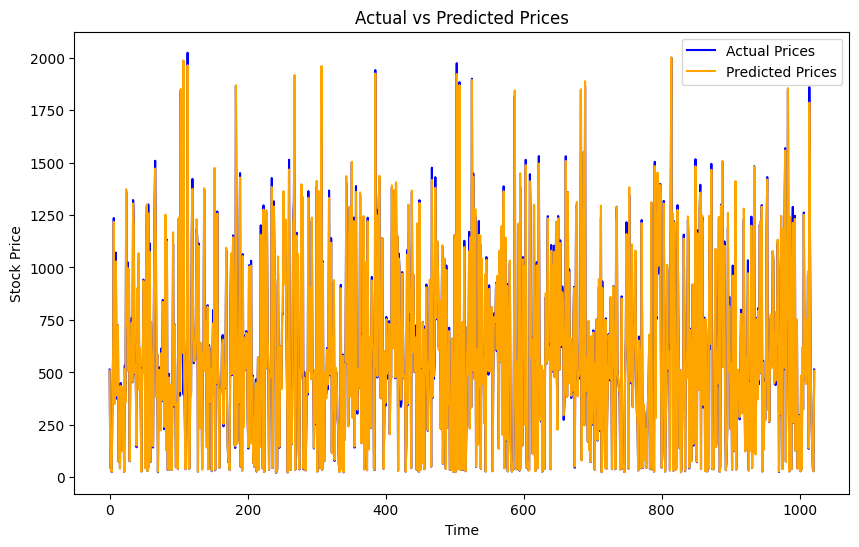

In [553]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt


# Ensure the Date column is in datetime format
data['Date'] = pd.to_datetime(data['Date'])


# Feature Engineering
data['Daily_Return'] = data['Close'].pct_change()
data['SMA_20'] = data['Close'].rolling(window=20).mean()
data['SMA_50'] = data['Close'].rolling(window=50).mean()
data['Volatility'] = data['Close'].rolling(window=20).std()

# Drop rows with NaN values generated from rolling calculations
data.dropna(inplace=True)
# Drop the last row with NaN target
data = data.dropna()

# Define Features (X) and Target (y)
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Daily_Return', 'SMA_20', 'SMA_50', 'Volatility']
X = data[features]
y = data['Target_Close']

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions
y_pred = rf_model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot Actual vs Predicted Prices
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label="Actual Prices", color="blue")
plt.plot(y_pred, label="Predicted Prices", color="orange")
plt.title("Actual vs Predicted Prices")
plt.xlabel("Time")
plt.ylabel("Stock Price")
plt.legend()
plt.show()


In [554]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,High-Low Range %,Daily Change %,Cumulative_Return,Volume_Change,SMA_50,SMA_200,Volatility,Target_Close,Daily_Return,SMA_20
199,2000-10-19,UTIBANK,EQ,36.65,37.00,38.75,37.00,38.50,38.30,38.19,...,4.729730,4.502046,0.434457,0.748487,37.193,34.95225,1.411650,37.35,0.045020,35.7225
200,2000-10-20,UTIBANK,EQ,38.30,36.05,38.95,36.05,37.40,37.35,37.79,...,8.044383,-2.480418,0.398876,-0.445139,37.189,35.00550,1.430366,37.25,-0.024804,35.7400
201,2000-10-23,UTIBANK,EQ,37.35,37.40,37.95,36.20,37.65,37.25,37.04,...,4.834254,-0.267738,0.395131,-0.029888,37.172,35.05750,1.466582,37.25,-0.002677,35.8325
202,2000-10-24,UTIBANK,EQ,37.25,37.80,37.80,36.30,37.10,37.25,36.94,...,4.132231,0.000000,0.395131,0.267795,37.154,35.11225,1.488694,38.10,0.000000,35.8600
203,2000-10-25,UTIBANK,EQ,37.25,36.15,38.35,36.15,38.10,38.10,37.80,...,6.085754,2.281879,0.426966,-0.236413,37.160,35.17300,1.568942,38.15,0.022819,35.9500


In [555]:
features=['Date','Close']

In [556]:
my_data=data[features]

In [557]:
my_data['Date']=pd.to_datetime(my_data['Date'])

<ipython-input-557-1a6f73018fcd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_data['Date']=pd.to_datetime(my_data['Date'])


In [558]:
my_data

,Date,Close
199,2000-10-19,38.30
200,2000-10-20,37.35
201,2000-10-23,37.25
202,2000-10-24,37.25
203,2000-10-25,38.10
...,...,...
5300,2021-04-23,671.35
5301,2021-04-26,700.45
5302,2021-04-27,699.55
5303,2021-04-28,708.15


In [559]:
my_data.index=my_data['Date']

In [560]:
del my_data['Date']

<Axes: xlabel='Date'>

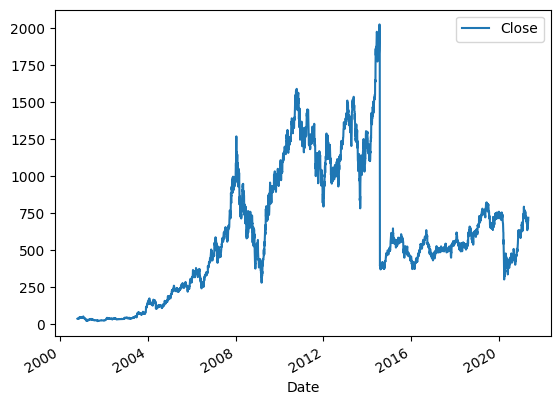

In [561]:
my_data.plot()

In [562]:
std_log=my_data.rolling(window=4).std()

In [563]:
mean_log=my_data.rolling(window=4).mean()

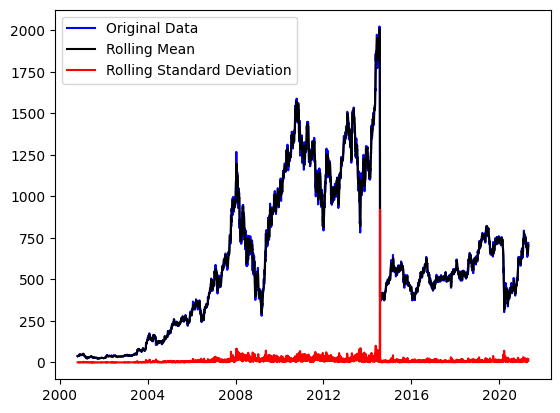

In [564]:
plt.plot(my_data,color='blue',label='Original Data')
plt.plot(mean_log,color='black',label='Rolling Mean')
plt.plot(std_log,color='red',label='Rolling Standard Deviation')
plt.legend(loc='best')

In [565]:
from statsmodels.tsa.stattools  import adfuller

In [566]:
#Augmented DickyFuller Test
result=adfuller(my_data['Close'])
keys=['test_statistics','p_value',"num_lags","num_observations","critical_values","AIC"]

In [567]:
for key,value in zip(keys,result):
  print(f"{key}:{value}")


test_statistics:-2.5940059598617644
p_value:0.0942424528051849
num_lags:1
num_observations:5104
critical_values:{'1%': -3.4316318557684675, '5%': -2.8621064441775963, '10%': -2.5670715184860238}
AIC:48382.64337117488


In [568]:
import numpy as np

In [569]:
first_log=np.log(my_data)

In [570]:
first_log.dropna()

,Close
Date,
2000-10-19,3.645450
2000-10-20,3.620333
2000-10-23,3.617652
2000-10-24,3.617652
2000-10-25,3.640214
...,...
2021-04-23,6.509291
2021-04-26,6.551723
2021-04-27,6.550437


<Axes: xlabel='Date'>

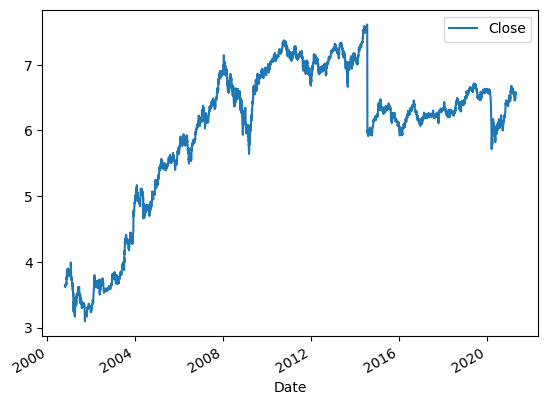

In [571]:
first_log.plot()

In [572]:
new_data=first_log-mean_log

Text(0.5, 1.0, 'Rolling mean and Standard deviation for log_scale data')

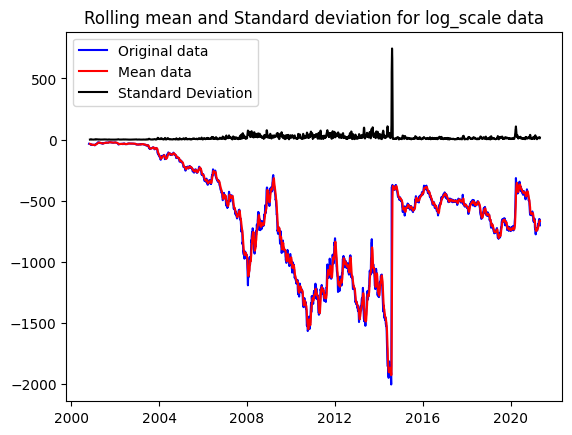

In [573]:
mean_log=new_data.rolling(window=12).mean()
std_log=new_data.rolling(window=12).std()

plt.plot(new_data,color='blue',label='Original data')
plt.plot(mean_log,color='red',label='Mean data')
plt.plot(std_log,color='black',label='Standard Deviation')

plt.legend(loc='best')
plt.title("Rolling mean and Standard deviation for log_scale data")

In [574]:
new_data

,Close
Date,
2000-10-19,NaN
2000-10-20,NaN
2000-10-23,NaN
2000-10-24,-33.919848
2000-10-25,-33.847286
...,...
2021-04-23,-650.978209
2021-04-26,-664.010777
2021-04-27,-675.962063


In [575]:
from statsmodels.tsa.stattools import acf,pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

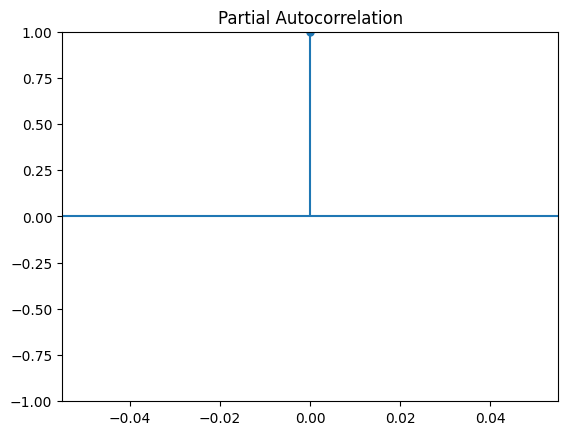

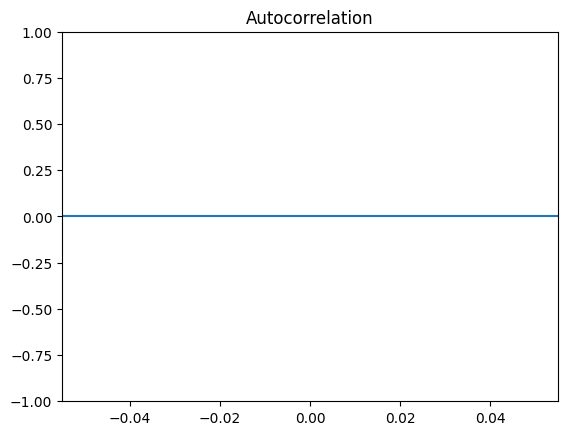

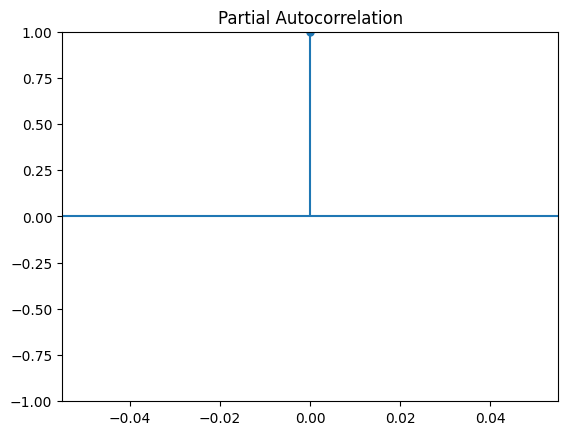

In [576]:
acf_values=acf(new_data)
plot_acf(new_data)
pacf_values=pacf(new_data,nlags=10)
plot_pacf(new_data)

In [577]:
from statsmodels.tsa.arima.model import ARIMA

In [578]:
train=new_df.iloc[:120]['Close']

In [579]:
test=new_df.iloc[120:]

In [580]:
model=ARIMA(train,order=(1,0,2))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


In [581]:
model_fit=model.fit()

In [582]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  120
Model:                 ARIMA(1, 0, 2)   Log Likelihood                -469.160
Date:                Sat, 07 Dec 2024   AIC                            948.320
Time:                        11:39:18   BIC                            962.258
Sample:                             0   HQIC                           953.981
                                - 120                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        543.8631     17.316     31.407      0.000     509.924     577.803
ar.L1          0.9373      0.042     22.580      0.000       0.856       1.019
ma.L1          0.1442      0.082      1.752      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

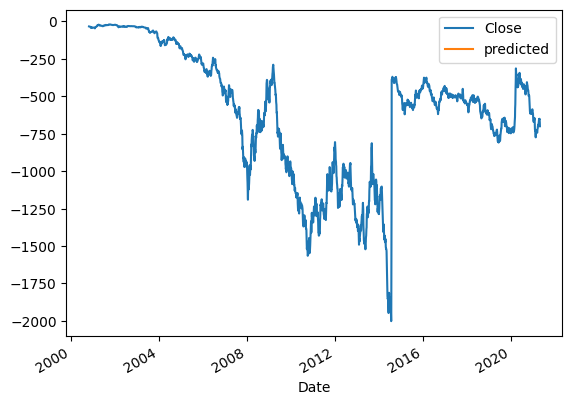

In [583]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

In [584]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [585]:
model=SARIMAX(train,order=(1,0,2),seasonal_order=(1,0,2,12))
model_fit=model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


<Axes: xlabel='Date'>

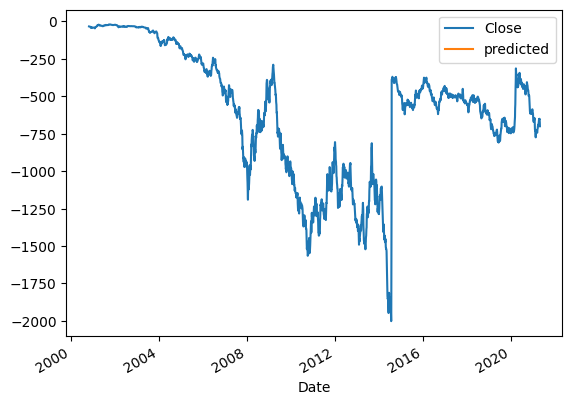

In [586]:
new_data['predicted']=model_fit.predict(start=len(train),end=len(train) + len(test)-1,dynamic=True)
new_data[['Close','predicted']].plot()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


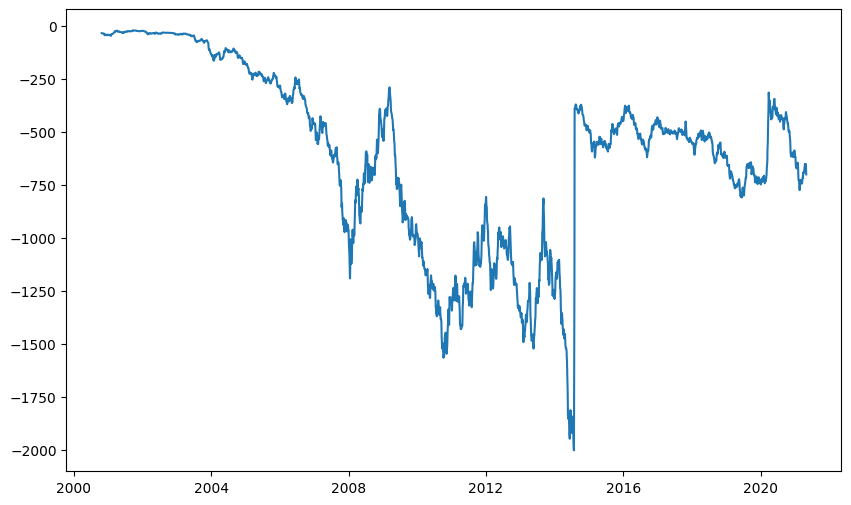

In [587]:
forecast=model_fit.forecast(steps=60)
plt.figure(figsize=(10,6))
plt.plot(new_data.index,new_data['Close'],label='Original Data')

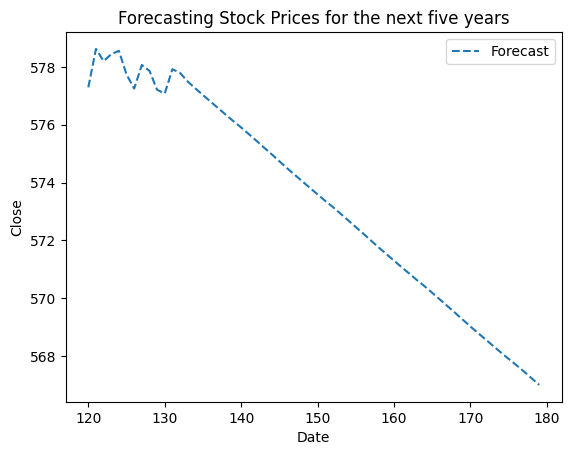

In [588]:
plt.plot(forecast.index,forecast,label='Forecast',linestyle='--')
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Forecasting Stock Prices for the next five years")
plt.legend()